# 项目-直播平台带货销售模型创建及预测

### 背景  
- 已知某直播平台带货数据
- 数据`直播带货.csv`包括字段
  > 转发量  
  > 流量指数（平台推广力度）  
  > 类类热度  
  > 成交额  
### 需求 ：如何根据历史数据，估计本次直播带货的成交量？

- 考虑需求并不复杂，训练数据种类也不多，使用sklearn的线性回归模型

In [3]:
#导入相关库,pandas, sklearn, matplotlib, seaborn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 读取数据

In [4]:
original_biz = pd.read_csv('直播带货.csv')
original_biz

,转发量,品类热度,流量推送,成交额
0,2646,7,5,260004
1,816,4,6,100004
2,1224,6,5,164502
3,1261,6,6,163001
4,1720,7,5,260401
...,...,...,...,...
1455,1121,4,5,140001
1456,1657,6,3,163503
1457,1652,8,5,392501
1458,1096,5,5,138805


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_biz`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：**结构和内容**，即整齐度和干净度。

> 数据的结构性问题:指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；  
> 数据的内容性问题:包括存在丢失数据、重复数据、无效数据等。

In [5]:
#复制一份训练数据作为清理后的结果
cleaned_biz = original_biz.copy()

### 数据整齐度

In [6]:
cleaned_biz.head(10)

,转发量,品类热度,流量推送,成交额
0,2646,7,5,260004
1,816,4,6,100004
2,1224,6,5,164502
3,1261,6,6,163001
4,1720,7,5,260401
5,1541,7,5,220002
6,827,5,7,107503
7,866,5,9,110504
8,1314,8,5,229461
9,1431,6,5,165004


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [7]:
# 接下来通过`info`，对数据内容进行大致了解。
cleaned_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   转发量     1460 non-null   int64
 1   品类热度    1460 non-null   int64
 2   流量推送    1460 non-null   int64
 3   成交额     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


- 从输出结果来看，`cleaned_biz`共有1460条观察值，变量不存在缺失值, 所有数据均为数值变量，类型都是int64

#### 处理缺失数据
从`info`方法的输出结果来看，`cleaned_biz`不存在缺失值，因此不需要对缺失数据进行处理。

#### 处理重复数据
根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

#### 处理不一致数据
不一致数据可能存在于所有分类变量中，改数据不存在分类变量，所以没有不一致数据问题。

#### 处理无效或错误数据
可以通过DataFrame的`describe`方法，对数值统计信息进行快速了解。

In [9]:
cleaned_biz.describe()

,转发量,品类热度,流量推送,成交额
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,6.099315,5.575342,180924.184247
std,525.480383,1.382997,1.112799,79442.451375
min,334.000000,1.000000,1.000000,34905.000000
25%,1129.500000,5.000000,5.000000,129976.750000
50%,1464.000000,6.000000,5.000000,163003.500000
75%,1776.750000,7.000000,6.000000,214001.000000
max,5642.000000,10.000000,9.000000,755004.000000


从以上统计信息来看，`cleaned_biz`里不存在脱离现实意义的数值。

## 用数据可视化观察数据分布情况

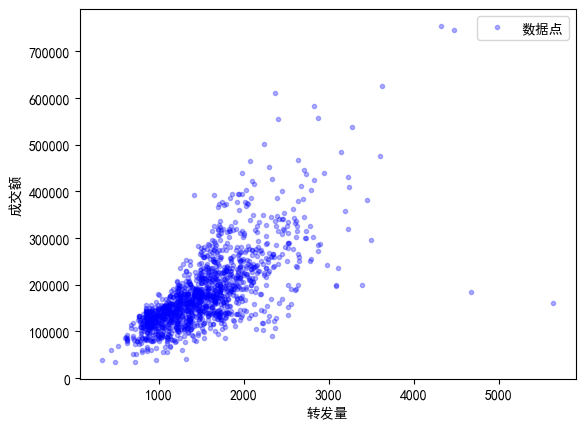

In [35]:
# 设置图标字体，显示中文
plt.rcParams['font.family']=['SimHei']
plt.rcParams['font.sans-serif']=['SimHei']

# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

#用matplotlib.pyplot的plot方法显示散点图
# plt.scatter(cleaned_biz['转发量'],cleaned_biz['成交额'],label='数据点',alpha=0.3)
plt.plot(cleaned_biz['转发量'],cleaned_biz['成交额'],'b.', label='数据点',alpha=0.3) # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('转发量') #y轴label
plt.ylabel('成交额') #x轴label
plt.legend() #显示图例
plt.show()

## 构建线性回归模型

**线性**回归就是一个通过建立线性方程来表述自变量和因变量之间关系的分析方法  
通过**回归线**我们可以根据自变量的值预测因变量的值，但是因变量有坑有多个，多个自变量放在一个一次多元方程中，即**多元线性回归**
$$y=b_0+b_1x_1+b_2x_2+...+b_nx_n$$

In [11]:
# 创建构建线性回归模型所需的因变量和自变量
y = cleaned_biz.成交额 #标签集
X=cleaned_biz.drop('成交额',axis=1) #特征集
X.head()

,转发量,品类热度,流量推送
0,2646,7,5
1,816,4,6
2,1224,6,5
3,1261,6,6
4,1720,7,5


In [12]:
y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 成交额, dtype: int64

In [37]:
# 将原始数据集进行80%（训练集）和20%（测试集）的分割
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression #导入线性回归算法模型
model = LinearRegression() #使用线性回归算法创建模型


### 训练模型

In [39]:
model.fit(X_train, y_train) #用训练集数据，训练机器，拟合函数，确定参数（斜率，截距）

LinearRegression()

In [40]:
print("线性回归测试集评分：",model.score(X_test, y_test))#评估模型
print("线性回归训练集评分：",model.score(X_train,y_train))#训练集评分

线性回归预测集评分： 0.662399563560639
线性回归训练集评分： 0.7293166018868376


### 预测集测试

In [43]:
y_predict = model.predict(X_test) #给测试集的x值，预测y值
df_biz_predict = X_test.copy() #测试集特征值拷贝 
df_biz_predict['成交额真值'] = y_test #增加一列放置测试集标签真值
df_biz_predict['成交额预测值'] = y_predict  #增加一列放置测试集标签预测值
df_biz_predict

,转发量,品类热度,流量推送,成交额真值,成交额预测值
529,1378,7,9,161003,204516.360122
491,2090,7,5,207504,242936.889154
459,2207,7,5,180004,249664.428319
279,1382,6,5,176002,169916.207270
655,1556,6,6,154003,180551.192841
...,...,...,...,...,...
326,1574,8,5,232003,245577.161314
440,833,5,7,117001,107297.933262
1387,1797,7,5,213501,226089.291075
1323,804,5,7,119001,105630.423555


### 用一个特征和标签展示线性回归图形

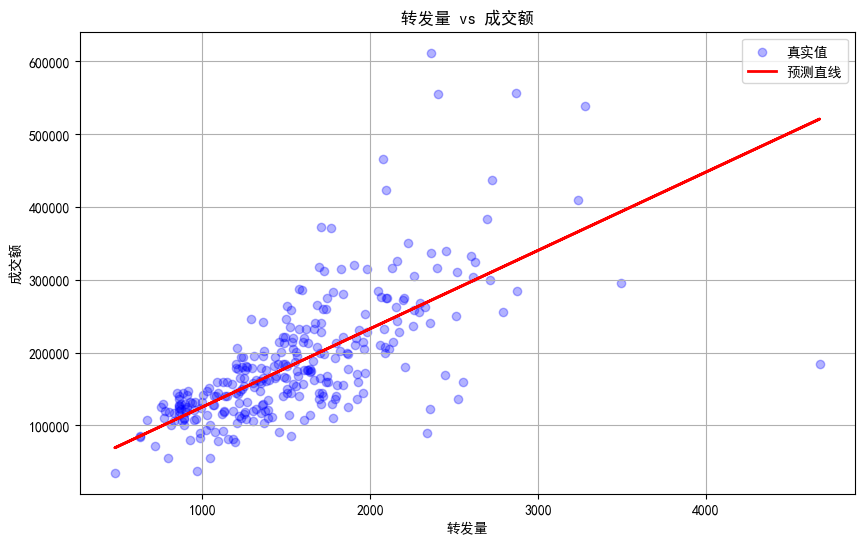

In [47]:
# 分离特征库和标签
X=cleaned_biz[['转发量']]
y=cleaned_biz.成交额

# 划分训练集合测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 使用线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

### 绘制预测直线
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color="blue", label="真实值",alpha=0.3)
plt.plot(X_test,y_pred,color="red",linewidth=2,label="预测直线")
plt.xlabel('转发量')
plt.ylabel('成交额')
plt.title('转发量 vs 成交额')
plt.legend()
plt.grid(True)
plt.show()